# Manipulação dos dados
## Retirando variáveis inúteis, alterando variáveis string para binário e repartindo os dados em X e Y

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
#Importar o DataSet

#PC do estágio
data = pd.read_excel("C:/Users/est.wesleymg/OneDrive - Votorantim/Votorantim Laranjeiras/Estudo_SOx/BaseDeDados/Dados_360dias_laranjeiras_12tags.xlsx"
                    , sheet_name=0)
#PC aqui de casa
#data = pd.read_excel("C:/Users/werico/OneDrive - Votorantim/Votorantim Laranjeiras/Estudo_SOx/BaseDeDados/Dados_360dias_laranjeiras_12tags.xlsx"
#                  , sheet_name=0)

#eliminando dados do forno 1 (desativado)
for tags in data.columns:
    if 'W1'in tags:
        data = data.drop(tags, axis=1)

# Alterando algumas variáveis do tipo string para valores binários

data = data.replace('Bad', 1)
data = data.replace('SemProducao', 0)
data = data.replace('Ligado', 1)
data = data.replace('Desligado', 0)
data = data.replace('No Sample', 0)
data = data.replace('Normal', 1)
data = data.replace('ON', 1)
data = data.replace('Off', 0)
data = data.replace('No Data', 0)
data = data.replace('Comm Fail', 0)
data = data.replace('Pt Created', 0)
data = data.replace('Calc Failed', 0)
data = data.replace('Invalid Data', 0)

#pegando somente os últimos valores (2 últimos meses)
data = data.tail(1440)
#Salvando as datas numa variável

datatempo = data['Data'].copy()

#Apagando a variável Data do meu DataSet

data = data.drop('Data', axis=1)
#data = data.drop('CI-MSE_U3U14M1', axis=1)

#Separando as variáveis em X e Y

X = data.drop('CI-W2X22A4_COR', axis=1)
y = data['CI-W2X22A4_COR']

In [4]:
data

,CI-W2_OPER_ON,CI-W2V21F1Q1,CI-GESSO_REC_SIO2,CI-H2_SO3,CI-J2T01X8,CI-W2V21F1,CI-GESSO_REC_FE2O3,CI-W2V21F1_T,CI-GESSO_REC_SO3,CI-W2W01A1S01,CI-MSE_J2T01M1_I3_PLC,CI-W2X22A4_COR
7201,0,0.000000,6.01352,0.95795,0.000000,0.000000,0.71063,0.000000,37.875370,0.000000,63.189888,0.000000
7202,0,0.000000,6.01352,0.95795,0.000000,0.000000,0.71063,0.000000,37.875370,0.000000,63.101311,0.000000
7203,0,0.000000,6.01352,0.95795,0.000000,0.000000,0.71063,0.000000,37.875370,0.000000,63.012733,0.000000
7204,0,0.000000,6.01352,0.95795,0.000000,0.000000,0.71063,0.000000,37.875370,0.000000,62.924156,0.000000
7205,0,0.000000,6.01352,0.95795,0.000000,0.000000,0.71063,0.000000,37.875370,0.000000,62.835579,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
8636,1,5.645075,2.98833,0.98774,1.805374,5.675443,0.35952,5.658241,38.913071,3.041900,149.674362,951.536560
8637,1,5.650940,2.98833,0.98774,1.821201,5.654325,0.35952,5.640422,38.913071,3.106091,151.812256,1142.086426
8638,1,5.651603,2.98833,0.98774,1.837028,5.623982,0.35952,5.628165,38.913071,3.029026,150.756760,1177.779297
8639,1,5.628850,2.98833,0.98774,1.852855,5.647767,0.35952,5.640314,38.913071,3.081995,150.048416,1210.736572


In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

In [9]:
f_regressor = SelectKBest(f_regression, k=5)
selecao = f_regressor.fit(X,y)
melhores_features = selecao.transform(X)
print(melhores_features)

[['0' 0.0 0.0 0.0 0.0]
 ['0' 0.0 0.0 0.0 0.0]
 ['0' 0.0 0.0 0.0 0.0]
 ...
 ['1' 5.651602745056152 5.6239824295043945 5.628164768218994
  3.0290260314941406]
 ['1' 5.62885046005249 5.647766590118408 5.640313625335693
  3.0819954872131348]
 ['1' 5.644155025482178 5.630906581878662 5.619400978088379
  3.0909981727600098]]


In [10]:
cols = selecao.get_support(indices=True)
data.iloc[:,cols]

,CI-W2_OPER_ON,CI-W2V21F1Q1,CI-W2V21F1,CI-W2V21F1_T,CI-W2W01A1S01
7201,0,0.000000,0.000000,0.000000,0.000000
7202,0,0.000000,0.000000,0.000000,0.000000
7203,0,0.000000,0.000000,0.000000,0.000000
7204,0,0.000000,0.000000,0.000000,0.000000
7205,0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
8636,1,5.645075,5.675443,5.658241,3.041900
8637,1,5.650940,5.654325,5.640422,3.106091
8638,1,5.651603,5.623982,5.628165,3.029026
8639,1,5.628850,5.647767,5.640314,3.081995


In [11]:
cols = selecao.get_support(indices=True)
data.iloc[:,cols].columns

Index(['CI-W2_OPER_ON', 'CI-W2V21F1Q1', 'CI-W2V21F1', 'CI-W2V21F1_T',
       'CI-W2W01A1S01'],
      dtype='object')

<IPython.core.display.Javascript object>


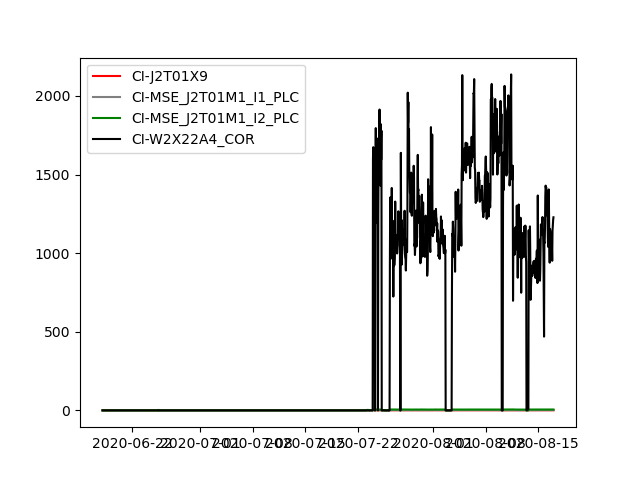

In [12]:
plt.plot(datatempo, data['CI-H2_SO3'], color='red', label='CI-J2T01X9')
plt.plot(datatempo, data['CI-J2T01X8'], color='gray', label ='CI-MSE_J2T01M1_I1_PLC' )
plt.plot(datatempo, data['CI-W2V21F1'], color='green', label= 'CI-MSE_J2T01M1_I2_PLC')
#plt.plot(datatempo, data['CI-W2_OPER_ON'], color='blue', label='CI-W2PRODUZ_ON_2')
plt.plot(datatempo, data['CI-W2X22A4_COR'], color='black', label ='CI-W2X22A4_COR' )
plt.legend()
plt.show()

In [13]:
data[['CI-J2T01X8', 'CI-H2_SO3','CI-W2X22A4_COR' ]].corr('spearman')

,CI-J2T01X8,CI-H2_SO3,CI-W2X22A4_COR
CI-J2T01X8,1.000000,-0.718505,0.873124
CI-H2_SO3,-0.718505,1.000000,-0.699874
CI-W2X22A4_COR,0.873124,-0.699874,1.000000


In [14]:
data.shape

(1440, 12)

In [16]:
y[y>0].describe()

count     524.000000
mean     1276.473326
std       348.488728
min         1.000000
25%      1048.189056
50%      1228.462402
75%      1510.439026
max      2136.835693
Name: CI-W2X22A4_COR, dtype: float64

<IPython.core.display.Javascript object>


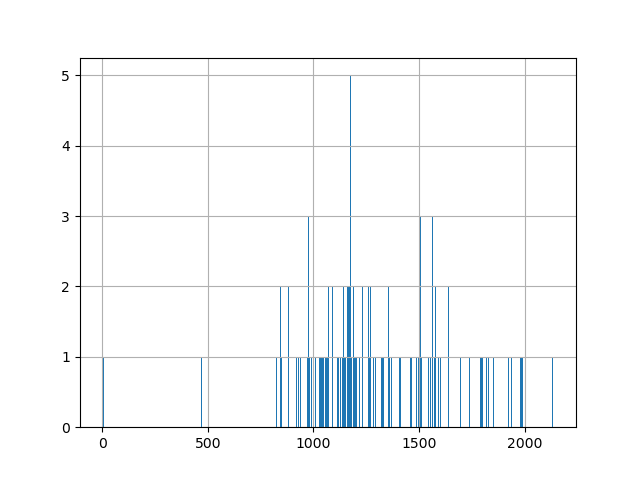

In [17]:
%matplotlib notebook
y[y>0].hist(bins=2000)

In [18]:
X['CI-H2_SO3'].describe()

count    1440.000000
mean        0.926973
std         0.051789
min         0.755310
25%         0.895130
50%         0.957950
75%         0.957950
max         1.067300
Name: CI-H2_SO3, dtype: float64

<IPython.core.display.Javascript object>


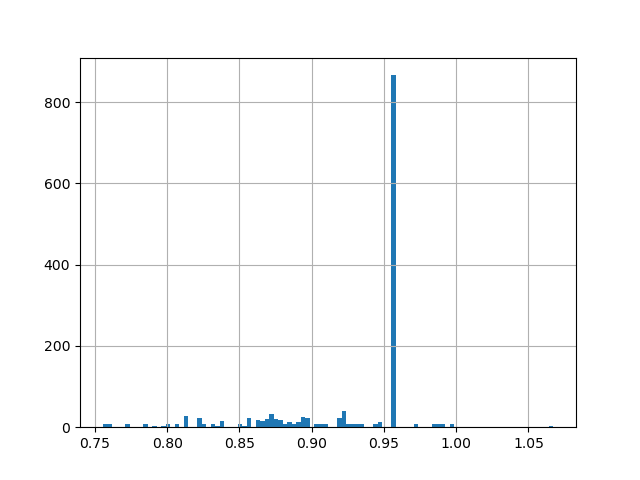

In [19]:
%matplotlib notebook
X['CI-H2_SO3'].hist(bins=100)

# Dividindo os dados em teste e treino

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

# Aplicando os modelos (Ridge, Lasso, RandomForestRegressor, MLPRegressor)

### Ridge

In [21]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
train_score_ridge=ridge.score(X_train, y_train)
test_score_ridge=ridge.score(X_test, y_test)

print(train_score_ridge)
print(test_score_ridge)

0.9326951640070953
0.912439363412614


In [22]:
Variaveis_importantes_Ridge = []
for tupla in sorted(zip(ridge.coef_, X.columns), reverse=True):
    Variaveis_importantes_Ridge.append(tupla)

### Ridge Regularizado

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled_Ridge = scaler.fit_transform(X_train)
X_test_scaled_Ridge = scaler.fit_transform(X_test)

linRidge = Ridge(alpha=100)
linRidge.fit(X_train_scaled_Ridge, y_train)
train_scaled_score_ridge=ridge.score(X_train_scaled_Ridge, y_train)
test_scaled_score_ridge=ridge.score(X_test_scaled_Ridge, y_test)
print(train_scaled_score_ridge)
print(test_scaled_score_ridge)

0.25656788675003217
0.30859920118356254


### Lasso

In [24]:
from sklearn.linear_model import Lasso
Lassos = Lasso(max_iter=100000, alpha=10)
Lassos.fit(X_train, y_train)
train_score_Lasso=Lassos.score(X_train, y_train)
test_score_Lasso=Lassos.score(X_test, y_test)

print(train_score_Lasso)
print(test_score_Lasso)

0.9278184883197755
0.9082247530074007


In [25]:
Variaveis_importantes_Lasso = []
for tupla1 in sorted(zip(Lassos.coef_, X.columns), reverse=True):
    Variaveis_importantes_Lasso.append(tupla1)

### Regressão Polinomial Grau 2

In [30]:
from sklearn.preprocessing import PolynomialFeatures
features_2 = PolynomialFeatures(degree=4)
#X_train_2 = X_train.reshape(-1,1)
X_train_poly2 = features_2.fit_transform(X_train)
X_test_poly2 = features_2.fit_transform(X_test)
X_train_poly2.shape

(1080, 1365)

#### Modelo Linear

In [31]:
from sklearn.linear_model import LinearRegression
modelo_linear_2 = LinearRegression()
modelo_linear_2.fit(X_train_poly2, y_train)
train_score_linear_2=modelo_linear_2.score(X_train_poly2, y_train)
test_score_linear_2=modelo_linear_2.score(X_test_poly2, y_test)
print(train_score_linear_2)
print(test_score_linear_2)

0.9998303667230599
-6890.320195937029


#### Ridge

In [28]:
modelo_Ridge_2 = Ridge(alpha=10)
modelo_Ridge_2.fit(X_train_poly2, y_train)
train_score_linear_2=modelo_Ridge_2.score(X_train_poly2, y_train)
test_score_linear_2=modelo_Ridge_2.score(X_test_poly2, y_test)
print(train_score_linear_2)
print(test_score_linear_2)

0.9629874527409457
0.9076840493192136


#### Lasso

In [33]:
modelo_Lasso_2 = Lasso(alpha=10, max_iter=1000000)
modelo_Lasso_2.fit(X_train_poly2, y_train)
train_score_Lasso_2=modelo_Lasso_2.score(X_train_poly2, y_train)
test_score_Lasso_2=modelo_Lasso_2.score(X_test_poly2, y_test)
print(train_score_Lasso_2)
print(test_score_Lasso_2)

0.9631218692216371
0.9084279706079539


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8892105.20027866, tolerance: 45761.06253838998
  model = cd_fast.enet_coordinate_descent(


### RandomForestRegressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parametros = {'max_features':np.arange(6,12),'n_estimators':[500],'min_samples_leaf': [10,50,100,200,500]}
modelo_r = RandomForestRegressor()
grid = GridSearchCV(modelo_r, param_grid=parametros, cv=3)
grid.fit(X_train, y_train)
print(f'Os melhores parâmetros são: {grid.best_estimator_} \n com o score: {grid.best_score_}')

Os melhores parâmetros são: RandomForestRegressor(max_features=10, min_samples_leaf=10, n_estimators=500) 
 com o score: 0.9498409654710365


In [35]:
from sklearn.ensemble import RandomForestRegressor
#modelo = RandomForestRegressor(max_features=9, min_samples_leaf=50, n_estimators=500, random_state=0)
modelo = RandomForestRegressor(max_features=10, min_samples_leaf=10,
                      n_estimators=500, random_state=0)
modelo.fit(X_train,y_train)
R2_treino = modelo.score(X_train,y_train)
R2_teste = modelo.score(X_test,y_test)
print(R2_treino)
print(R2_teste)

0.9707252808733283
0.9466977020681888


In [36]:
Variaveis_importantes_RandomForest = []
for tuplax in sorted(zip(modelo.feature_importances_, X.columns), reverse=True):
    Variaveis_importantes_RandomForest.append(tuplax)

### MLPRegressor

In [37]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
parametros_m = {'hidden_layer_sizes': [(30,30), (35,35), (40,40)], 'alpha':[10**-3, 1e-01,1,10,100,200]}
modelo_m = MLPRegressor(random_state=0, max_iter=10000, solver='lbfgs')
grid_m = GridSearchCV(modelo_m, param_grid=parametros_m, cv=3)
grid_m.fit(X_train, y_train)
print(f'Os melhores parâmetros são: {grid_m.best_estimator_} \n com o score: {grid_m.best_score_}')

Os melhores parâmetros são: MLPRegressor(alpha=0.1, hidden_layer_sizes=(35, 35), max_iter=10000,
             random_state=0, solver='lbfgs') 
 com o score: 0.9377388951776559


In [38]:
from sklearn.neural_network import MLPRegressor
#modelo_RedeNeural = MLPRegressor(hidden_layer_sizes=(10,10),alpha=1,solver='lbfgs',
#                                 max_iter=2000, random_state=0).fit(X_train,y_train)
modelo_RedeNeural = MLPRegressor(alpha=0.1, hidden_layer_sizes=(30, 30), max_iter=10000,
             random_state=0, solver='lbfgs').fit(X_train,y_train)
R2_treino_RedeNeural = modelo_RedeNeural.score(X_train,y_train)
R2_teste_RedeNeural = modelo_RedeNeural.score(X_test,y_test)

print(R2_treino_RedeNeural)
print(R2_teste_RedeNeural)

0.9414245722373213
0.9162235300031167


### SVR 

In [40]:
from sklearn.svm import SVR
modelo_SVR = SVR(kernel='poly', gamma=10**-5).fit(X_train, y_train)
R2_treino_svr = modelo_SVR.score(X_train, y_train)
R2_teste_svr = modelo_SVR.score(X_test, y_test)

print(R2_treino_svr)
print(R2_teste_svr)

-0.5025032532838916
-0.49604832270295574


### KNN

In [41]:
from sklearn.neighbors import KNeighborsRegressor
modelo_knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
R2_treino_knn = modelo_knn.score(X_train,y_train)
R2_teste_knn = modelo_knn.score(X_test,y_test)
print(R2_treino_knn)
print(R2_teste_knn)

0.9556302724792821
0.9257731640665278


# Importando dados de um dia de operação para realizar o teste dos modelos!

In [42]:
#PC do estágio
datat = pd.read_excel("C:/Users/est.wesleymg/OneDrive - Votorantim/Votorantim Laranjeiras/Estudo_SOx/BaseDeDados/Dados_360dias_laranjeiras_12tags.xlsx"
                    , sheet_name=1)
#PC aqui de casa
#datat = pd.read_excel("C:/Users/werico/OneDrive - Votorantim/Votorantim Laranjeiras/Estudo_SOx/BaseDeDados/Dados_360dias_laranjeiras_64tags.xlsx"
#                  , sheet_name=1)


# Alterando algumas variáveis do tipo string para valores binários

datat = datat.replace('Bad', 1)
datat = datat.replace('SemProducao', 0)
datat = datat.replace('Ligado', 1)
datat = datat.replace('Desligado', 0)
datat = datat.replace('No Sample', 0)
datat = datat.replace('Normal', 1)
datat = datat.replace('ON', 1)
datat = datat.replace('Off', 0)
datat = datat.replace('No Data', 0)
datat = datat.replace('Comm Fail', 0)
datat = datat.replace('Pt Created', 0)
datat = datat.replace('Calc Failed', 0)
datat = datat.replace('Invalid Data', 0)
#datat = datat.drop('CI-W2X22A4', axis=1)

#Limpando dados do tipo string

"""lista_str_t = []

for label_t in datat.columns:
    for value_t in datat[label_t]:
        if type(value_t) is str:
            if label_t not in lista_str_t:
                lista_str_t.append(label_t)

datat = datat.drop(lista_str_t, axis=1)"""
#Salvando as datas numa variável

DataTempoT = datat['Data'].copy()

#Apagando a variável Data do meu DataSet

datat = datat.drop('Data', axis=1)
#datat = datat.drop(lista, axis=1)

#Separando as variáveis em X e Y

X1 = datat.drop('CI-W2X22A4_COR', axis=1)
y1 = datat['CI-W2X22A4_COR']

In [43]:
X1.shape

(49, 11)

In [44]:
X.shape

(1440, 11)

# Comparando os resultados dos modelos

In [45]:
Resultados = []
for result in zip(ridge.predict(X1), Lassos.predict(X1), modelo.predict(X1), modelo_RedeNeural.predict(X1),
                  modelo_SVR.predict(X1), modelo_knn.predict(X1), y1):
    Resultados.append(result)
scores = pd.DataFrame(Resultados, columns = ['Ridge', 'Lasso', 'RandomForest', 'MLP', 'SVR', 'KNN', 'Dados da Planta'])
scores['Data'] = DataTempoT
scores.head(50)

,Ridge,Lasso,RandomForest,MLP,SVR,KNN,Dados da Planta,Data
0,1427.252665,1344.391964,1275.796949,1432.889695,5.102119,1418.915283,1228.077881,2020-08-17 00:00:00
1,1378.495304,1333.710584,1284.227440,1417.994544,5.205454,1193.051550,1367.841064,2020-08-17 01:00:00
2,1380.181467,1337.121840,1313.908354,1418.978573,5.114466,1418.915283,1240.867676,2020-08-17 02:00:00
3,1384.511612,1346.178838,1319.353366,1436.170720,5.225456,1219.310828,1299.596924,2020-08-17 03:00:00
4,1376.654056,1336.605703,1348.863059,1411.124489,5.313183,1279.732031,1192.176514,2020-08-17 04:00:00
5,1392.972861,1352.668659,1353.220211,1455.972017,5.186839,1118.621472,1084.830444,2020-08-17 05:00:00
6,1383.367430,1343.805161,1298.646797,1423.246035,5.238377,1427.030884,1154.697754,2020-08-17 06:00:00
7,1363.783749,1336.958053,1339.582356,1407.123564,5.442467,1316.245703,1150.152344,2020-08-17 07:00:00
8,1372.835738,1339.353211,1300.979683,1391.155087,5.453388,1308.005908,1017.000488,2020-08-17 08:00:00
9,1363.872130,1340.770270,1364.683340,1403.595441,5.525082,1412.622095,1033.825928,2020-08-17 09:00:00


<IPython.core.display.Javascript object>


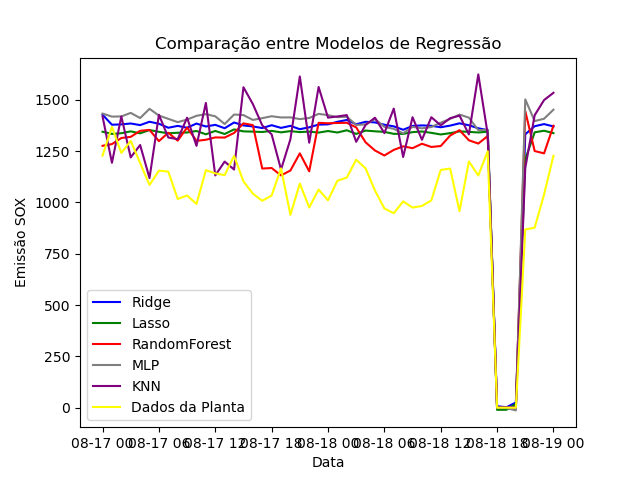

In [46]:
%matplotlib notebook
plt.plot(scores['Data'], scores['Ridge'], color='blue', label='Ridge' )
plt.plot(scores['Data'], scores['Lasso'], color = 'green', label='Lasso')
plt.plot(scores['Data'], scores['RandomForest'], color = 'red', label='RandomForest')
plt.plot(scores['Data'], scores['MLP'], color = 'gray', label='MLP')
plt.plot(scores['Data'], scores['KNN'], color = 'purple', label='KNN')
plt.plot(scores['Data'], scores['Dados da Planta'], color='yellow', label='Dados da Planta')
plt.xlabel("Data")
plt.ylabel("Emissão SOX")
plt.title('Comparação entre Modelos de Regressão')
plt.legend()
plt.show()

## Variáveis importantes para cada modelo

### Ridge

In [110]:
Variaveis_importantes_Ridge

[(134.14579206968781, 'CI-W2_OPER_ON'),
 (114.30978595891415, 'CI-W2V21F1Q1'),
 (102.94177856626953, 'CI-GESSO_REC_SIO2'),
 (82.90696712404599, 'CI-H3_SO3'),
 (51.62464637869969, 'CI-J2T01X8'),
 (49.10918287035592, 'CI-W2V21F1'),
 (44.02495692246381, 'CI-GESSO_REC_FE2O3'),
 (39.81875327009928, 'CI-W2V21F1_T'),
 (38.630886480576756, 'CI-GESSO_REC_SO3'),
 (33.143243951547355, 'CI-W2W01A1S01'),
 (22.402234689378155, 'CI-MSE_J2T01M1_I3_PLC'),
 (18.602373470083535, 'CI-GESSO_REC_K2O'),
 (14.980461749400677, 'CI-W2CLK_PL_PLC'),
 (9.94842676342823, 'CI-EE1_CPIIF32_CaO'),
 (8.597852611860207, 'CI-GESSO_REC_AL2O3'),
 (6.894486837035303, 'CI-K3COQSLDP325_PLC'),
 (5.526161273120372, 'CI-Z2B01A1F01_BS'),
 (4.438194254392254, 'CI-W2A01F1Q1'),
 (2.3700421446121447, 'CI-W2K90I1'),
 (2.314721899791447, 'CI-MSE_J2T01M1_PLC'),
 (1.79864017609814, 'CI-K2COQSLDP325_PLC'),
 (1.7232696230356874, 'CI-W2K14SP'),
 (1.279280443385864, 'CI-W2K18SP'),
 (1.1688017185728925, 'CI-w2_ALIM_tot_x'),
 (1.168632748684954

In [92]:
for c in Variaveis_importantes_Ridge:
    if c[0]>0:
        print(c[1])


CI-W2_OPER_ON
CI-W2V21F1Q1
CI-GESSO_REC_SIO2
CI-H3_SO3
CI-J2T01X8
CI-W2V21F1
CI-GESSO_REC_FE2O3
CI-W2V21F1_T
CI-GESSO_REC_SO3
CI-W2W01A1S01
CI-MSE_J2T01M1_I3_PLC
CI-GESSO_REC_K2O
CI-W2CLK_PL_PLC
CI-EE1_CPIIF32_CaO
CI-GESSO_REC_AL2O3
CI-K3COQSLDP325_PLC
CI-Z2B01A1F01_BS
CI-W2A01F1Q1
CI-W2K90I1
CI-MSE_J2T01M1_PLC
CI-K2COQSLDP325_PLC
CI-W2K14SP
CI-W2K18SP
CI-w2_ALIM_tot_x
CI-w2_ALIM_tota
CI-R3far_P170_PLC
CI-W3CLK_CL_PLC
CI-R2FAR_MS_PLC
CI-R3FAR_MS_PLC
CI-R2_MIN
CI-W2CLK_MS_PLC
CI-R3FAR_MA_PLC
CI-W2W01M2S01
CI-W3CLK_MS_PLC
CI-W2CLK_SO3_PLC
CI-EG1_CPVARI_R1


### Lasso

In [93]:
Variaveis_importantes_Lasso

[(42.66231549320576, 'CI-W2V21F1Q1'),
 (4.808207299350212, 'CI-Z2B01A1F01_BS'),
 (4.255422840977203, 'CI-GESSO_REC_SO3'),
 (1.9186452625859565, 'CI-W2A01F1Q1'),
 (1.4102062644955098, 'CI-W2K90I1'),
 (0.718490766415599, 'CI-W2V21M3I1'),
 (0.5748146733904546, 'CI-R2_MIN'),
 (0.4149098736666361, 'CI-W2K18SP'),
 (0.315352436541799, 'CI-W2W01M2S01'),
 (0.2143019443367387, 'CI-MSE_J2T01M1_PLC'),
 (0.20777871364176811, 'CI-W2X22A2'),
 (0.026238530185652687, 'CI-EG1_CPVARI_R1'),
 (0.00010240288370595673, 'CI-w2_ALIM_tot'),
 (9.248830388804168e-06, 'CI-MSE_ALIM_SE-U2_TOT'),
 (3.0602057435243015e-10, 'CI-w2_ALIM_tot_y'),
 (0.0, 'CI-w2_ALIM_tota'),
 (0.0, 'CI-w2_ALIM_tot_x'),
 (-0.0, 'CI-W3CLK_PL_PLC'),
 (0.0, 'CI-W3CLK_MS_PLC'),
 (0.0, 'CI-W3CLK_CL_PLC'),
 (0.0, 'CI-W2_OPER_ON'),
 (0.0, 'CI-W2W01A1S01'),
 (0.0, 'CI-W2V28F1Q1'),
 (0.0, 'CI-W2V21SP'),
 (0.0, 'CI-W2V21F1_T'),
 (0.0, 'CI-W2V21F1'),
 (-0.0, 'CI-W2PRODUCAO'),
 (0.0, 'CI-W2K91I1'),
 (0.0, 'CI-W2K14SP'),
 (0.0, 'CI-W2CLK_SO3_PLC'),
 (0.

In [94]:
for c in Variaveis_importantes_Lasso:
    if c[0]>0:
        print(c[1])

CI-W2V21F1Q1
CI-Z2B01A1F01_BS
CI-GESSO_REC_SO3
CI-W2A01F1Q1
CI-W2K90I1
CI-W2V21M3I1
CI-R2_MIN
CI-W2K18SP
CI-W2W01M2S01
CI-MSE_J2T01M1_PLC
CI-W2X22A2
CI-EG1_CPVARI_R1
CI-w2_ALIM_tot
CI-MSE_ALIM_SE-U2_TOT
CI-w2_ALIM_tot_y


### RandomForestRegressor

In [95]:
Variaveis_importantes_RandomForest

[(0.10517661940423798, 'CI-W2V21F1'),
 (0.09243228138091192, 'CI-W2V21F1_T'),
 (0.07603840117454376, 'CI-W2V21SP'),
 (0.06354475081267706, 'CI-W2V28F1Q1'),
 (0.056735819237819195, 'CI-W2X22A2'),
 (0.052795510173752114, 'CI-W2PRODUCAO'),
 (0.052066380036052524, 'CI-W2V21F1Q1'),
 (0.051875390483198676, 'CI-W2W01M2S01'),
 (0.05132899632130556, 'CI-W2W01A1S01'),
 (0.049067673945109185, 'CI-J2T01X8'),
 (0.03121667065427356, 'CI-W2_OPER_ON'),
 (0.024565948212295255, 'CI-J2T01X9'),
 (0.022236641251590878, 'CI-W2A01F1Q1'),
 (0.020001827841347568, 'CI-W2K18SP'),
 (0.019585433823061004, 'CI-MSE_J2T01M1_I3_PLC'),
 (0.01761245739668848, 'CI-Z2B01A1F01_BS'),
 (0.013593717509987703, 'CI-W2K13SP'),
 (0.012315435768890012, 'CI-W2K14SP'),
 (0.01201520615582298, 'CI-W2V21M3I1'),
 (0.008224620179684448, 'CI-MSE_J2T01M1_I1_PLC'),
 (0.007889412259931589, 'CI-W2K91I1'),
 (0.007495403692992921, 'CI-MSE_J2T01M1_PLC'),
 (0.0074248895079901565, 'CI-W2CLK_FSC_PLC'),
 (0.006749489373319829, 'CI-W2CLK_CL_PLC'),
 (

In [111]:
datat[['CI-H3_SO3', 'CI-W2X22A4_COR']].tail(50)

,CI-H3_SO3,CI-W2X22A4_COR
47,0.98538,1210.736572
48,0.98538,1228.077881
49,0.96740,1367.841064
50,0.96740,1240.867676
51,0.96740,1299.596924
52,0.96740,1192.176514
53,0.96740,1084.830444
54,0.96740,1154.697754
55,0.96740,1150.152344
56,0.96740,1017.000488


In [70]:
c = 0
for x in Variaveis_importantes_RandomForest:
    c = c+ 1
    if 'CI-H3_SO3' in x[1]:
        print(x[])

7.232694818578953e-06
5.784984232336915e-06
1.8489063739902515e-06
9.707306872997982e-08
1.1135162709289792e-08
1.8918345492443108e-10
1.6902796922209134e-11
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [71]:
c = 0
for x in Variaveis_importantes_Ridge:
    c = c+ 1
    if 'SO3' in x[1]:
        print(x[0])

0.00016540024451616964
9.695897724371592e-05
9.614379426081805e-05
7.66383851464742e-05
7.633765094934191e-05
4.513001004310053e-05
3.748161391233127e-05
1.7219123063091604e-05
1.7140600749676298e-05
4.449609751536776e-08
3.4183705894998834e-08
3.158254021914227e-09
7.680041407273627e-10
0.0
-3.7690753616390253e-06
-4.465988481924635e-06
-6.994297300750866e-06
-7.069208747048824e-06
-1.0304454395552335e-05
-3.3172684776887646e-05
-4.257473103897439e-05
-4.628740148386579e-05
-4.805674223588463e-05
-5.5618607713539385e-05
-6.76767307412842e-05
-7.311105398760784e-05
-7.322155386016068e-05
-7.649309148478428e-05
-8.233523941864455e-05
-0.00010369562615397513
-0.00012806119528426243
-0.00017220840208528366
-0.00021802932517007675
-0.00028661375959472427
-0.000287688061869361


In [73]:
c = 0
for x in Variaveis_importantes_Lasso:
    c = c+ 1
    if 'SO3' in x[1]:
        print(x[0])

-0.0
0.0
-0.0
0.0
-0.0
0.0
0.0
0.0
-0.0
-0.0
-0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
0.0
-0.0
-0.0
-0.0
0.0
0.0
0.0
-0.0
0.0
-0.0
-0.0
0.0
0.0
0.0
0.0


In [114]:
data[['CI-H3_SO3', 'CI-W2X22A4_COR']].corr()

,CI-H3_SO3,CI-W2X22A4_COR
CI-H3_SO3,1.000000,0.024048
CI-W2X22A4_COR,0.024048,1.000000


In [79]:
data[['CI-W2V21F1_T', 'CI-W2X22A4_COR']].corr()

,CI-W2V21F1_T,CI-W2X22A4_COR
CI-W2V21F1_T,1.000000,0.951319
CI-W2X22A4_COR,0.951319,1.000000
